In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
dt= pd.read_csv('delivery_time.csv')
dt

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
dt.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
dt.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
dt.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [8]:
dt=dt.rename({'Delivery Time':'deliverytime', 'Sorting Time':'sortingtime'},axis=1)
dt

,deliverytime,sortingtime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


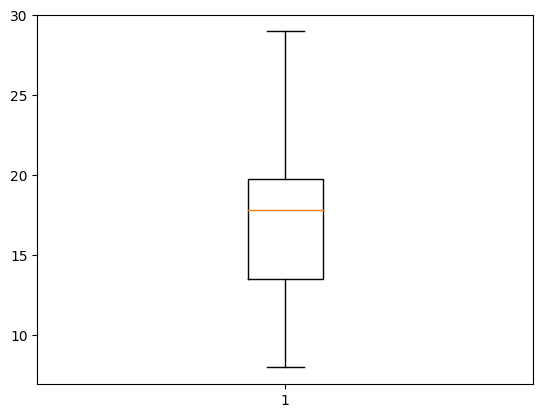

In [9]:
plt.boxplot(dt['deliverytime'])
plt.show()

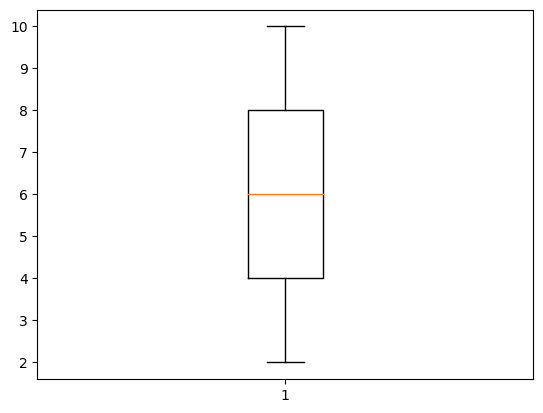

In [10]:
plt.boxplot(dt['sortingtime'])
plt.show()

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

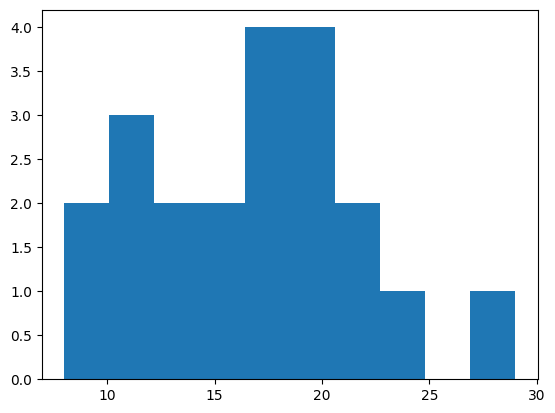

In [11]:
plt.hist(dt['deliverytime'])

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

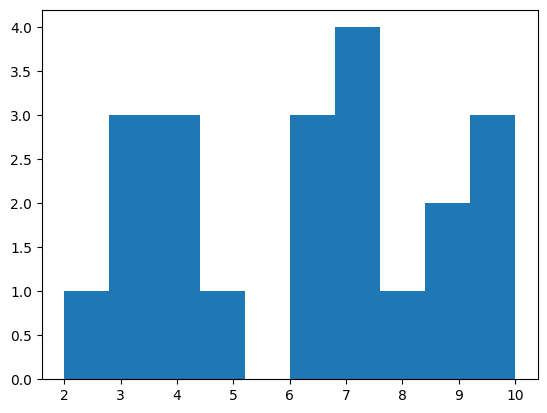

In [12]:
plt.hist(dt['sortingtime'])

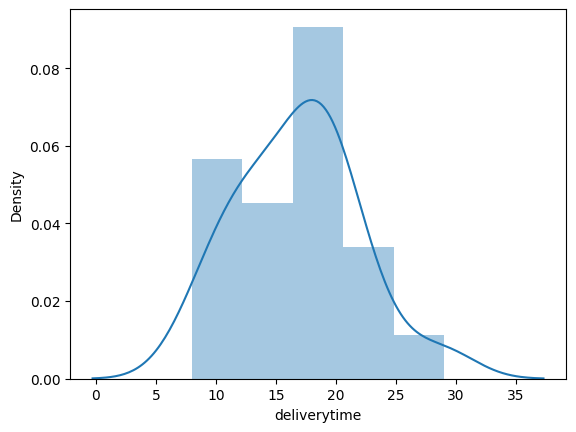

In [13]:
import warnings
warnings.filterwarnings('ignore')
sn.distplot(dt['deliverytime'])
plt.show()

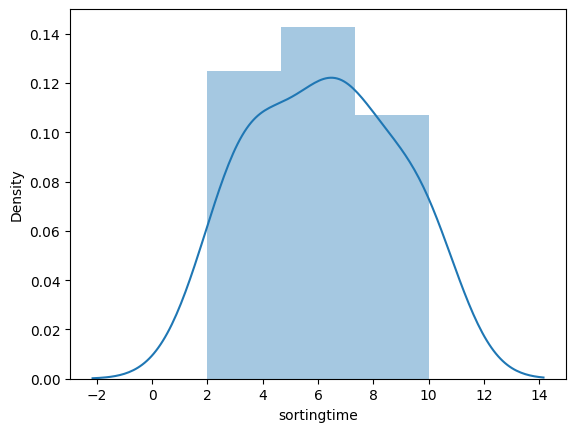

In [14]:
import warnings
warnings.filterwarnings('ignore')
sn.distplot(dt['sortingtime'])
plt.show()

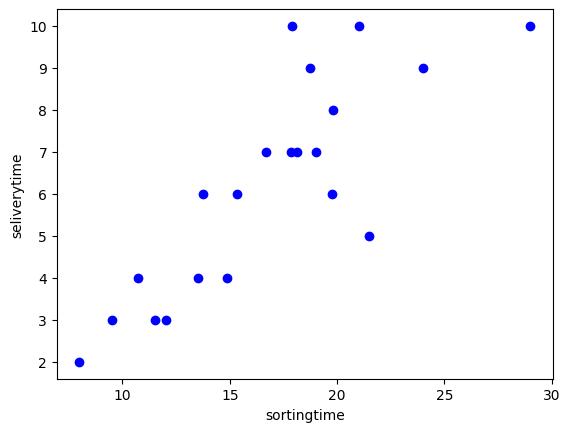

In [15]:
plt.plot(dt['deliverytime'],dt['sortingtime'],'bo')
plt.xlabel('sortingtime')
plt.ylabel('seliverytime')
plt.show()

In [16]:
dt.corr()

,deliverytime,sortingtime
deliverytime,1.000000,0.825997
sortingtime,0.825997,1.000000


<Axes: xlabel='sortingtime', ylabel='deliverytime'>

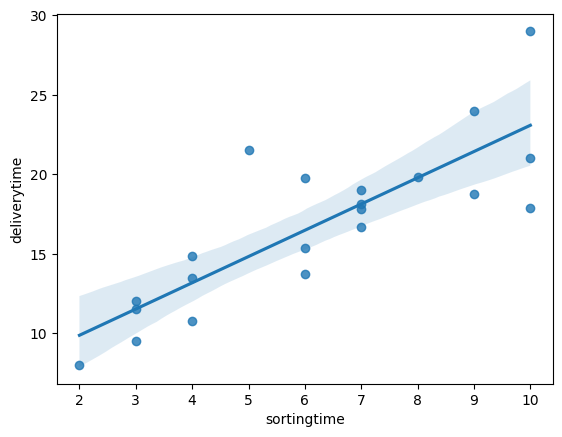

In [17]:
sn.regplot(x='sortingtime', y = 'deliverytime',data=dt)

In [18]:
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
model = smf.ols('deliverytime ~ sortingtime',data=dt).fit()

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliverytime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           3.98e-06
Time:                        06:03:46   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
sortingtime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model.params

Intercept      6.582734
sortingtime    1.649020
dtype: float64

In [21]:
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [22]:
model.pvalues, model.tvalues

(Intercept      0.001147
 sortingtime    0.000004
 dtype: float64,
 Intercept      3.823349
 sortingtime    6.387447
 dtype: float64)

In [23]:
pred = model.predict(dt.sortingtime)
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [24]:
rmse_lin= np.sqrt(np.mean((np.array(dt['deliverytime'])-np.array(pred))**2))
rmse_lin

2.7916503270617654

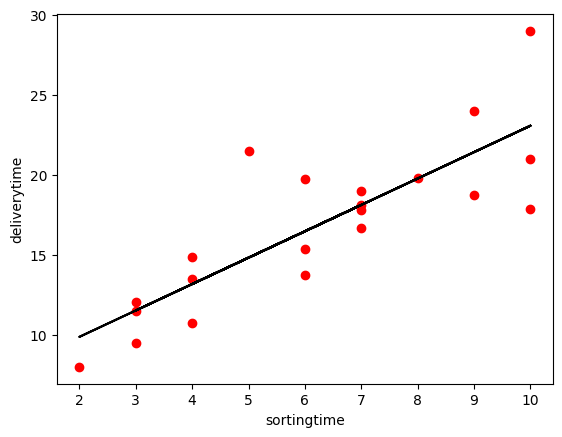

In [25]:
plt.scatter(x=dt['sortingtime'],y = dt['deliverytime'],color ='red')
plt.plot(dt['sortingtime'],pred,color='black')
plt.xlabel('sortingtime')
plt.ylabel('deliverytime')
plt.show()

In [26]:
model2 = smf.ols('deliverytime ~ np.log(sortingtime)',data=dt).fit()

In [27]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliverytime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           2.64e-06
Time:                        06:03:46   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sortingtime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
pred2 = model2.predict(pd.DataFrame(dt['sortingtime']))
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [29]:
rmse_log= np.sqrt(np.mean((np.array(dt['deliverytime'])-np.array(pred2))**2))
rmse_log

2.733171476682066

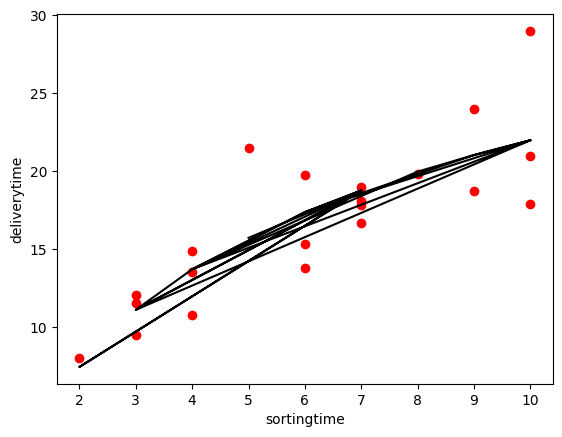

In [30]:
plt.scatter(x=dt['sortingtime'],y = dt['deliverytime'],color ='red')
plt.plot(dt['sortingtime'],pred2,color='black')
plt.xlabel('sortingtime')
plt.ylabel('deliverytime')
plt.show()

In [31]:
model3 = smf.ols('np.log(deliverytime) ~ sortingtime',data=dt).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(deliverytime)   R-squared:                       0.711
Model:                              OLS   Adj. R-squared:                  0.696
Method:                   Least Squares   F-statistic:                     46.73
Date:                  Mon, 29 Jan 2024   Prob (F-statistic):           1.59e-06
Time:                          06:03:46   Log-Likelihood:                 7.7920
No. Observations:                    21   AIC:                            -11.58
Df Residuals:                        19   BIC:                            -9.495
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
sortingtime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
pred_log = model3.predict(dt['sortingtime'])
pred_log

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [33]:
pred3=np.exp(pred_log)
pred3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [34]:
rmse_exp= np.sqrt(np.mean((np.array(dt['deliverytime'])-np.array(pred3))**2))
rmse_exp

2.9402503230562007

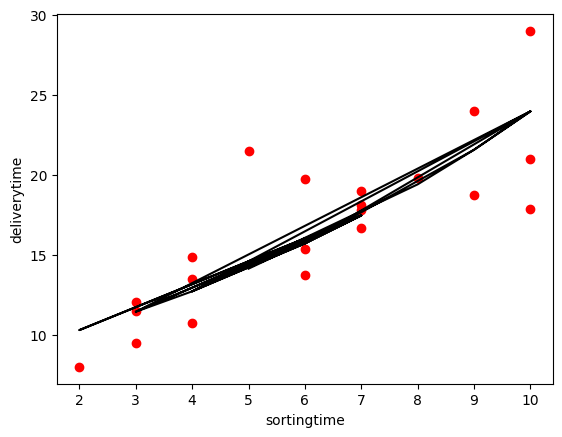

In [35]:
plt.scatter(x=dt['sortingtime'],y = dt['deliverytime'],color ='red')
plt.plot(dt['sortingtime'],pred3,color='black')
plt.xlabel('sortingtime')
plt.ylabel('deliverytime')
plt.show()

In [36]:
dt['sortingtime_sqr'] = dt.sortingtime*dt.sortingtime
dt

,deliverytime,sortingtime,sortingtime_sqr
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [37]:
model4 = smf.ols('np.log(deliverytime)~ sortingtime+sortingtime_sqr',data=dt).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(deliverytime)   R-squared:                       0.765
Model:                              OLS   Adj. R-squared:                  0.739
Method:                   Least Squares   F-statistic:                     29.28
Date:                  Mon, 29 Jan 2024   Prob (F-statistic):           2.20e-06
Time:                          06:03:47   Log-Likelihood:                 9.9597
No. Observations:                    21   AIC:                            -13.92
Df Residuals:                        18   BIC:                            -10.79
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.6997      0.228      7.441      0.000       1.220       2.180
sortingtime         0.2659      0.080      3.315      0.004       0.097       0.434
sortingtime_sqr    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
pred_exp = model4.predict(dt)
pred4=np.exp(pred_exp)
pred4

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [39]:
rmse_quad = np.sqrt(np.mean((np.array(dt['deliverytime'])-np.array(pred4))**2))
rmse_quad

2.799041988740932

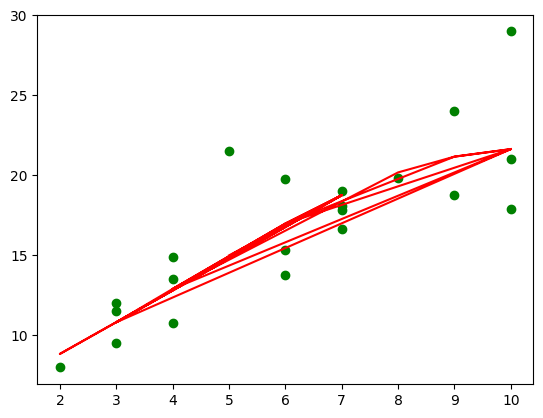

In [40]:
plt.scatter(dt.sortingtime,dt.deliverytime, color = 'green')
plt.plot(dt.sortingtime,pred4, 'r')

In [41]:
model4.resid_pearson

array([-0.18653701,  0.27510944,  0.92331151,  0.76937448,  1.79789238,
       -0.62623272,  0.0766711 , -0.80301506, -1.16851536, -0.74833548,
       -0.11118848, -1.12531927, -0.72398172,  0.37160353,  0.64861345,
        0.8734897 , -1.3029903 , -0.21828016, -0.61938087, -0.31407821,
        2.21178906])

In [42]:
print(rmse_lin)
print(rmse_log)
print(rmse_exp)
print(pred_exp)

2.7916503270617654
2.733171476682066
2.9402503230562007
0     3.074863
1     2.557942
2     2.832974
3     3.052913
4     3.074863
5     2.832974
6     2.931968
7     2.381905
8     3.074863
9     3.052913
10    3.005281
11    2.557942
12    2.931968
13    2.381905
14    2.381905
15    2.557942
16    2.832974
17    2.931968
18    2.180186
19    2.931968
20    2.708299
dtype: float64


In [43]:
print(model.rsquared)
print(model2.rsquared)
print(model3.rsquared)
print(model4.rsquared)

0.6822714748417231
0.6954434611324223
0.7109478980584187
0.7648666342953729


In [44]:
data = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model4.rsquared])}
table=pd.DataFrame(data)
table

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,2.791650,0.682271
1,rmse_log,2.733171,0.695443
2,rmse_exp,2.940250,0.710948
3,rmse_quad,2.799042,0.764867


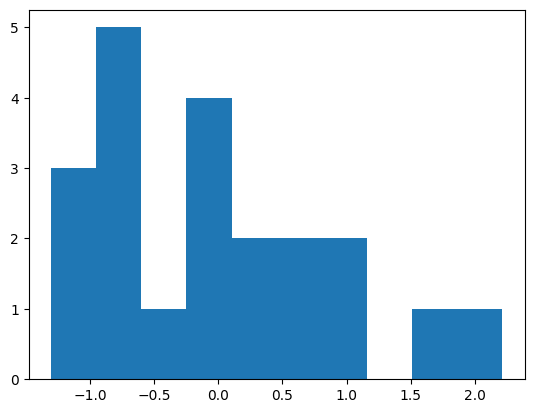

In [45]:
plt.hist(model4.resid_pearson)
plt.show()

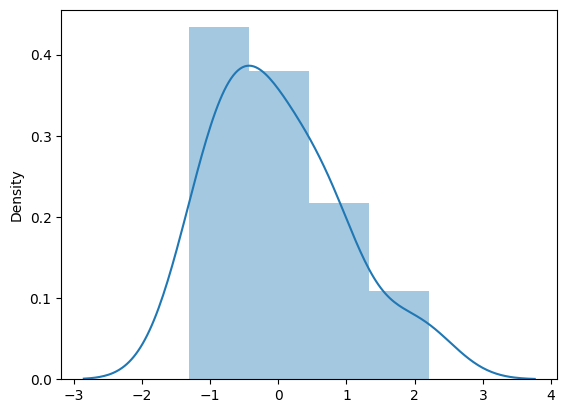

In [46]:
sn.distplot(model4.resid_pearson)
plt.show()

Text(0, 0.5, 'nrml')

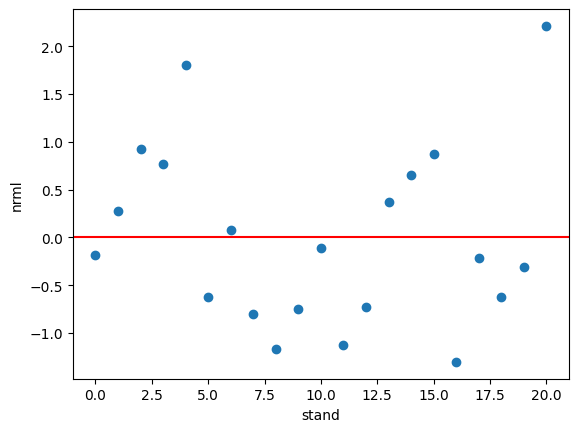

In [47]:
plt.scatter(np.arange(21),model4.resid_pearson)
plt.axhline(y=0, color = 'red')
plt.xlabel('stand')
plt.ylabel('nrml')